## Parametric Bootstrap simulation of sampling distributions for MLE estimators

In [40]:
x <- c(1997, 906, 904, 32)

x.n = sum(x)
x.a = sum(x)
x.b = x[1] - 2*x[2] - 2*x[3] -x[4]
x.c = 2*x[4]
x.theta.mle = (sqrt(x.b*x.b + 4*x.a*x.c) + x.b)/(2*x.a)

print(x.theta.mle)

[1] 0.0357123


In [41]:
# Simulation sampling distribution of estimator

# Function computing cell probabilities given hardy-Weinberg theta parameter
fcn.probs.hardyweinberg <- function(theta0){
    probs = c(0.25*(2+theta0), 0.25*(1-theta0), 0.25*(1-theta0), 0.25*theta0)
    return(probs)
}

# Function computing cell counts given w.sample, a sample of single-outcome multinomial
# random variables (comparable to Bernoulli outcomes underlying a binomial)
fcn.w.sample.counts <- function(w.sample, w.samplespace){
    result = 0 * w.samplespace
    for (j.outcome in c(1:length(w.samplespace))){
        result[j.outcome] <- sum(w.sample == w.samplespace[j.outcome])
    }
    return(result)
}

args(sample)

function (x, size, replace = FALSE, prob = NULL) 
NULL

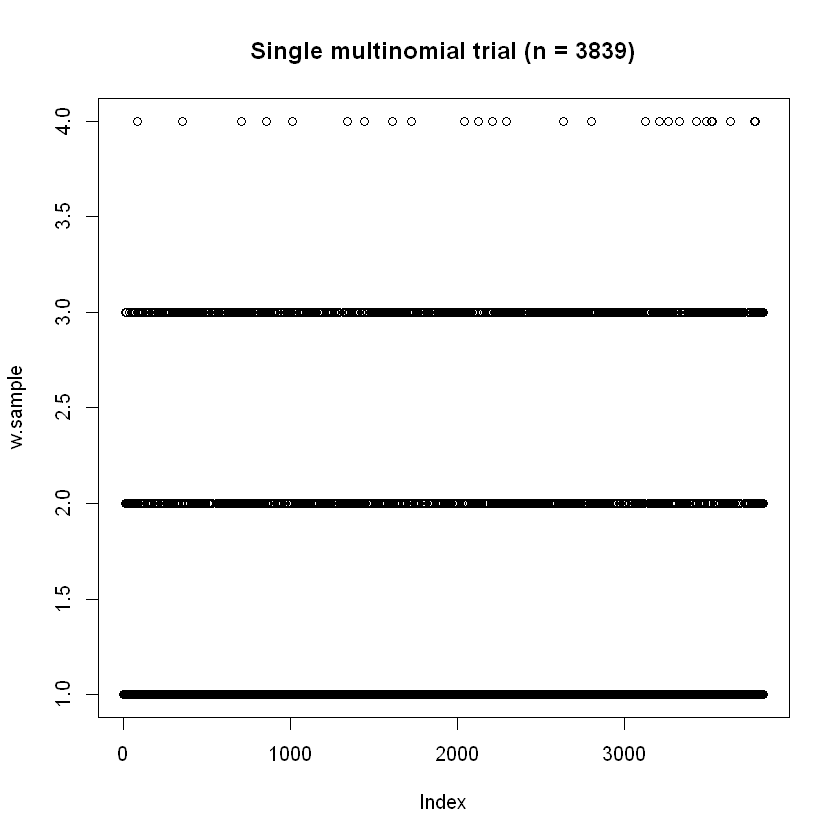

In [42]:
w.samplespace = c(1, 2, 3, 4)

w.sample = sample(x = w.samplespace, size = x.n, replace = TRUE,
                 prob = fcn.probs.hardyweinberg(x.theta.mle))

w.sample.counts <- fcn.w.sample.counts(w.sample, w.samplespace)

par(mfcol = c(1, 1))

plot(w.sample, main = paste("Single multinomial trial (n = ", as.character(x.n), ")", sep = ""))

In [43]:
print(table(w.sample))

w.sample
   1    2    3    4 
1975  900  937   27 


In [44]:
print(w.sample.counts)

[1] 1975  900  937   27


In [45]:
# Conduct simulation
n.simulations = 20000

data.simulations <- matrix(NA, nrow = n.simulations, ncol = 1)

for (j.simulation in c(1:n.simulations)){
    j.w.sample = sample(x = w.samplespace, size = x.n, replace = TRUE,
                       prob = fcn.probs.hardyweinberg(x.theta.mle))
    j.w.sample.counts <- fcn.w.sample.counts(j.w.sample, w.samplespace)
    x.j = j.w.sample.counts
    
    x.j.a = sum(x.j)
    x.j.b = x.j[1] - 2*x.j[2] - 2*x.j[3] - x.j[4]
    x.j.c = 2*x.j[4]
    
    x.j.theta.mle = (sqrt(x.j.b*x.j.b + 4*x.j.a*x.j.c) + x.j.b)/(2*x.j.a)
    data.simulations[j.simulation, 1] = x.j.theta.mle
}

print(simulation.var <- apply(data.simulations, 2, var))

[1] 3.363249e-05


In [46]:
print(var.x.theta.mle <- 4/(x.n*(1/(2+x.theta.mle) + 2/(1-x.theta.mle) + 1/x.theta.mle)))

[1] 3.408719e-05


In [47]:
# Simulation results

print(simulations.mean <- apply(data.simulations, 2, mean))

[1] 0.0357474


In [48]:
print(simulations.stdev <- sqrt(apply(data.simulations, 2, var)))

[1] 0.005799353


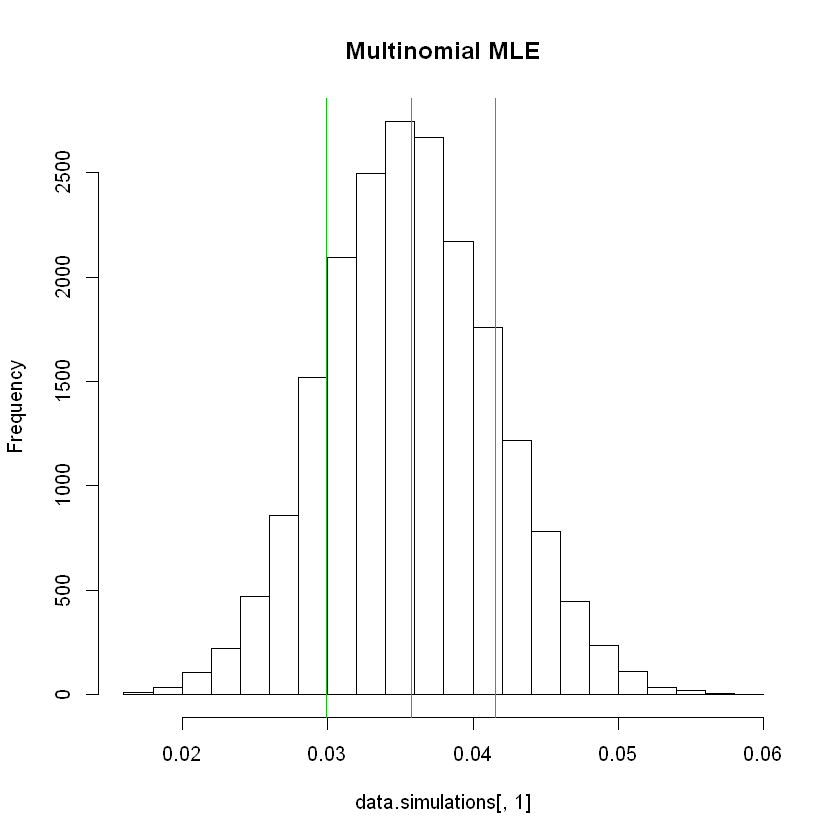

In [49]:
hist(data.simulations[,1], main = "Multinomial MLE")
abline(v = simulations.mean[1] + c(-1, 0, 1)*simulations.stdev[1], col = c(3, 3, 3))

In [50]:
# Histogram of estimation errors for each estimator
data.simulations.error = data.simulations - x.theta.mle

print(simulations.error.means <- apply(data.simulations.error, 2, mean))

[1] 3.510257e-05


In [51]:
print(simulations.error.stdevs <- sqrt(apply(data.simulations.error, 2, var)))

[1] 0.005799353


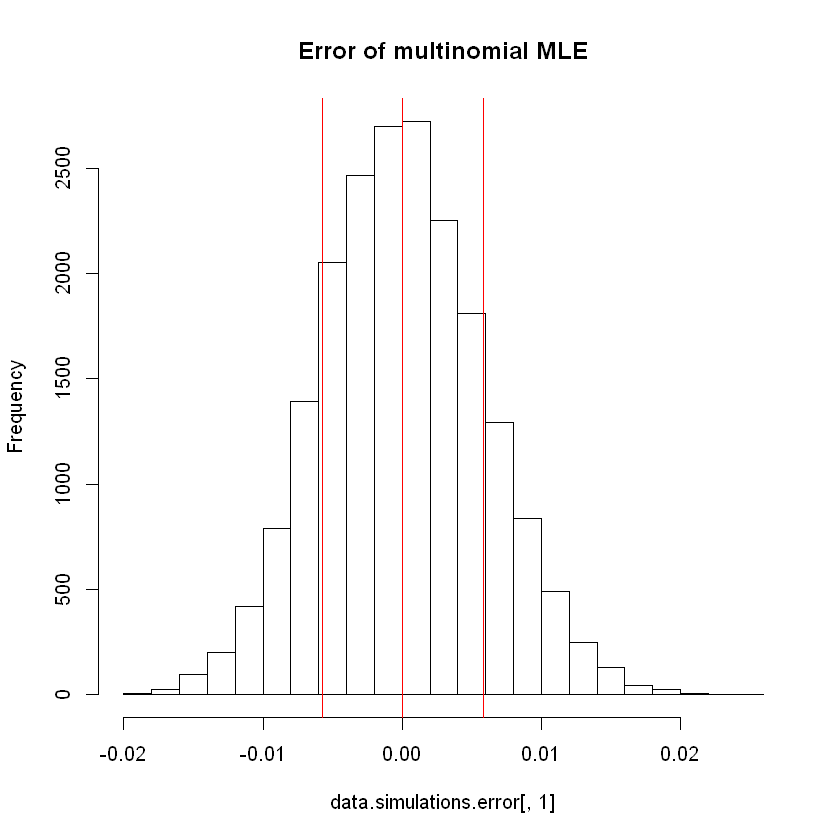

In [52]:
hist(data.simulations.error[,1], main = "Error of multinomial MLE")
abline(v = simulations.error.means[1] + c(-1, 0, 1)*simulations.error.stdevs[1], col = c(2, 2, 2))

In [53]:
# Bootstrap confidence interval
head(data.simulations.error)

-0.002064439
0.001376102
-0.003381911
-0.005810443
-0.012529968
-0.007306921


In [54]:
# Approximate 99% confidence interval based on MLE
approx.CI.limits.99percent.mle = x.theta.mle + c(- quantile(data.simulations.error[,1], probs = 0.995),
                                                - quantile(data.simulations.error[,1], probs = 0.005))
approx.CI.limits.99percent.mle

99.5%       0.5% 
0.02021353 0.05000929

## Plot Beta distribution

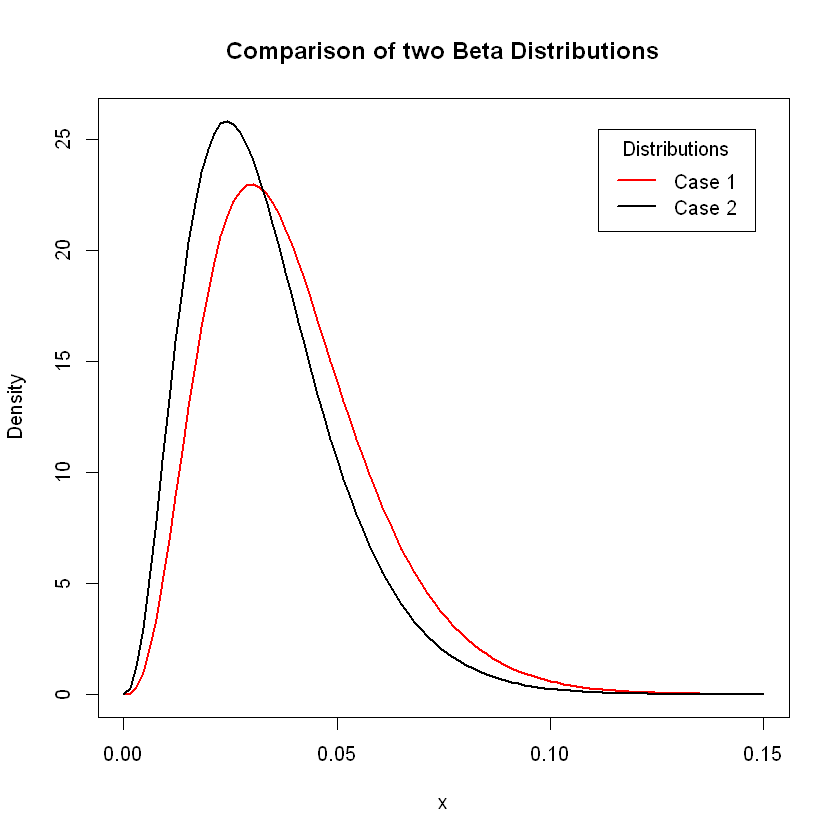

In [55]:
x <- seq(0, 0.15, length=100)
hx1 <- dbeta(x, 4, 98, ncp = 0, log = FALSE)
hx2 <- dbeta(x, 3.5, 102, ncp = 0, log = FALSE)

colors <- c("red", "black")
labels <- c("Case 1", "Case 2")

#plot(x, hx1, type = "l", lty = 1, xlab = "x", ylab = "Density", main = "Comparison of two Beta Distributions")

plot(x, hx2, type = "l", lty = 1, xlab = "x", ylab = "Density", main = "Comparison of two Beta Distributions")

lines(x, hx1, lwd = 2, col = colors[1])
lines(x, hx2, lwd = 2, col = colors[2])

legend("topright", inset = .05, title = "Distributions", labels, lwd = 2, lty = c(1, 1), col = colors)